# Wine Quality Prediction Project Using Logistic Regression

The Wine Quality Prediction project aims to classify wine quality based on various chemical properties using logistic regression. This project leverages a dataset containing numerous attributes of wines to build a predictive model that can assess the quality of wine as 'Good' or 'Bad'. The primary objective of this project is to develop a logistic regression model that can accurately classify the quality of wine based on the aforementioned chemical properties. This classification helps wine producers and consumers in quality control and decision-making processes.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv("wine.csv")
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol quality  
0         9.4     bad  
1         9.8     bad  
2         9.8     bad  
3         9.8    good  
4         9.4     bad  
...       ...     ...  
1594     10.5     bad  
1595     11.2    good  
1596     11.0    good  
1597     10.2     bad  
1598     11.0    good  

[1599 rows x 12 columns]

In [14]:
data.shape

(1599, 12)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [16]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

**Dataset Description**


The dataset used for this project consists of the following features:

Fixed Acidity: The amount of non-volatile acids in wine (e.g., tartaric acid).

Volatile Acidity: The amount of volatile acids in wine (e.g., acetic acid), which can lead to an unpleasant vinegar taste if too high.

Citric Acid: A minor acid in wines that can add freshness and flavor.

Residual Sugar: The amount of sugar remaining after fermentation, affecting sweetness.

Chlorides: The amount of salt in the wine, influencing its taste.

Free Sulfur Dioxide: The amount of SO2 that is not bound to other molecules, protecting wine from microbial growth and oxidation.

Total Sulfur Dioxide: The total amount of SO2, both free and bound, present in the wine.

Density: The density of the wine, closely related to its alcohol and sugar content.

pH: The measure of acidity/alkalinity of the wine.

Sulphates: Additives that can contribute to the wine's sulfur dioxide levels, affecting its taste and preservation.

Alcohol: The alcohol content of the wine.

The target variable is the quality of the wine, categorized into 'Good' or 'Bad'.

# Data analysis

In [2]:
# Encoding

In [22]:
data['quality_cat'] = data['quality'].astype('category').cat.codes
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  quality_cat  
0      9.4     bad            0  
1      9.8     bad            0  
2      9.8     bad            0  
3      9.8    good            1  
4      9.4     bad            0

C:\Users\ELITEBOOK\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


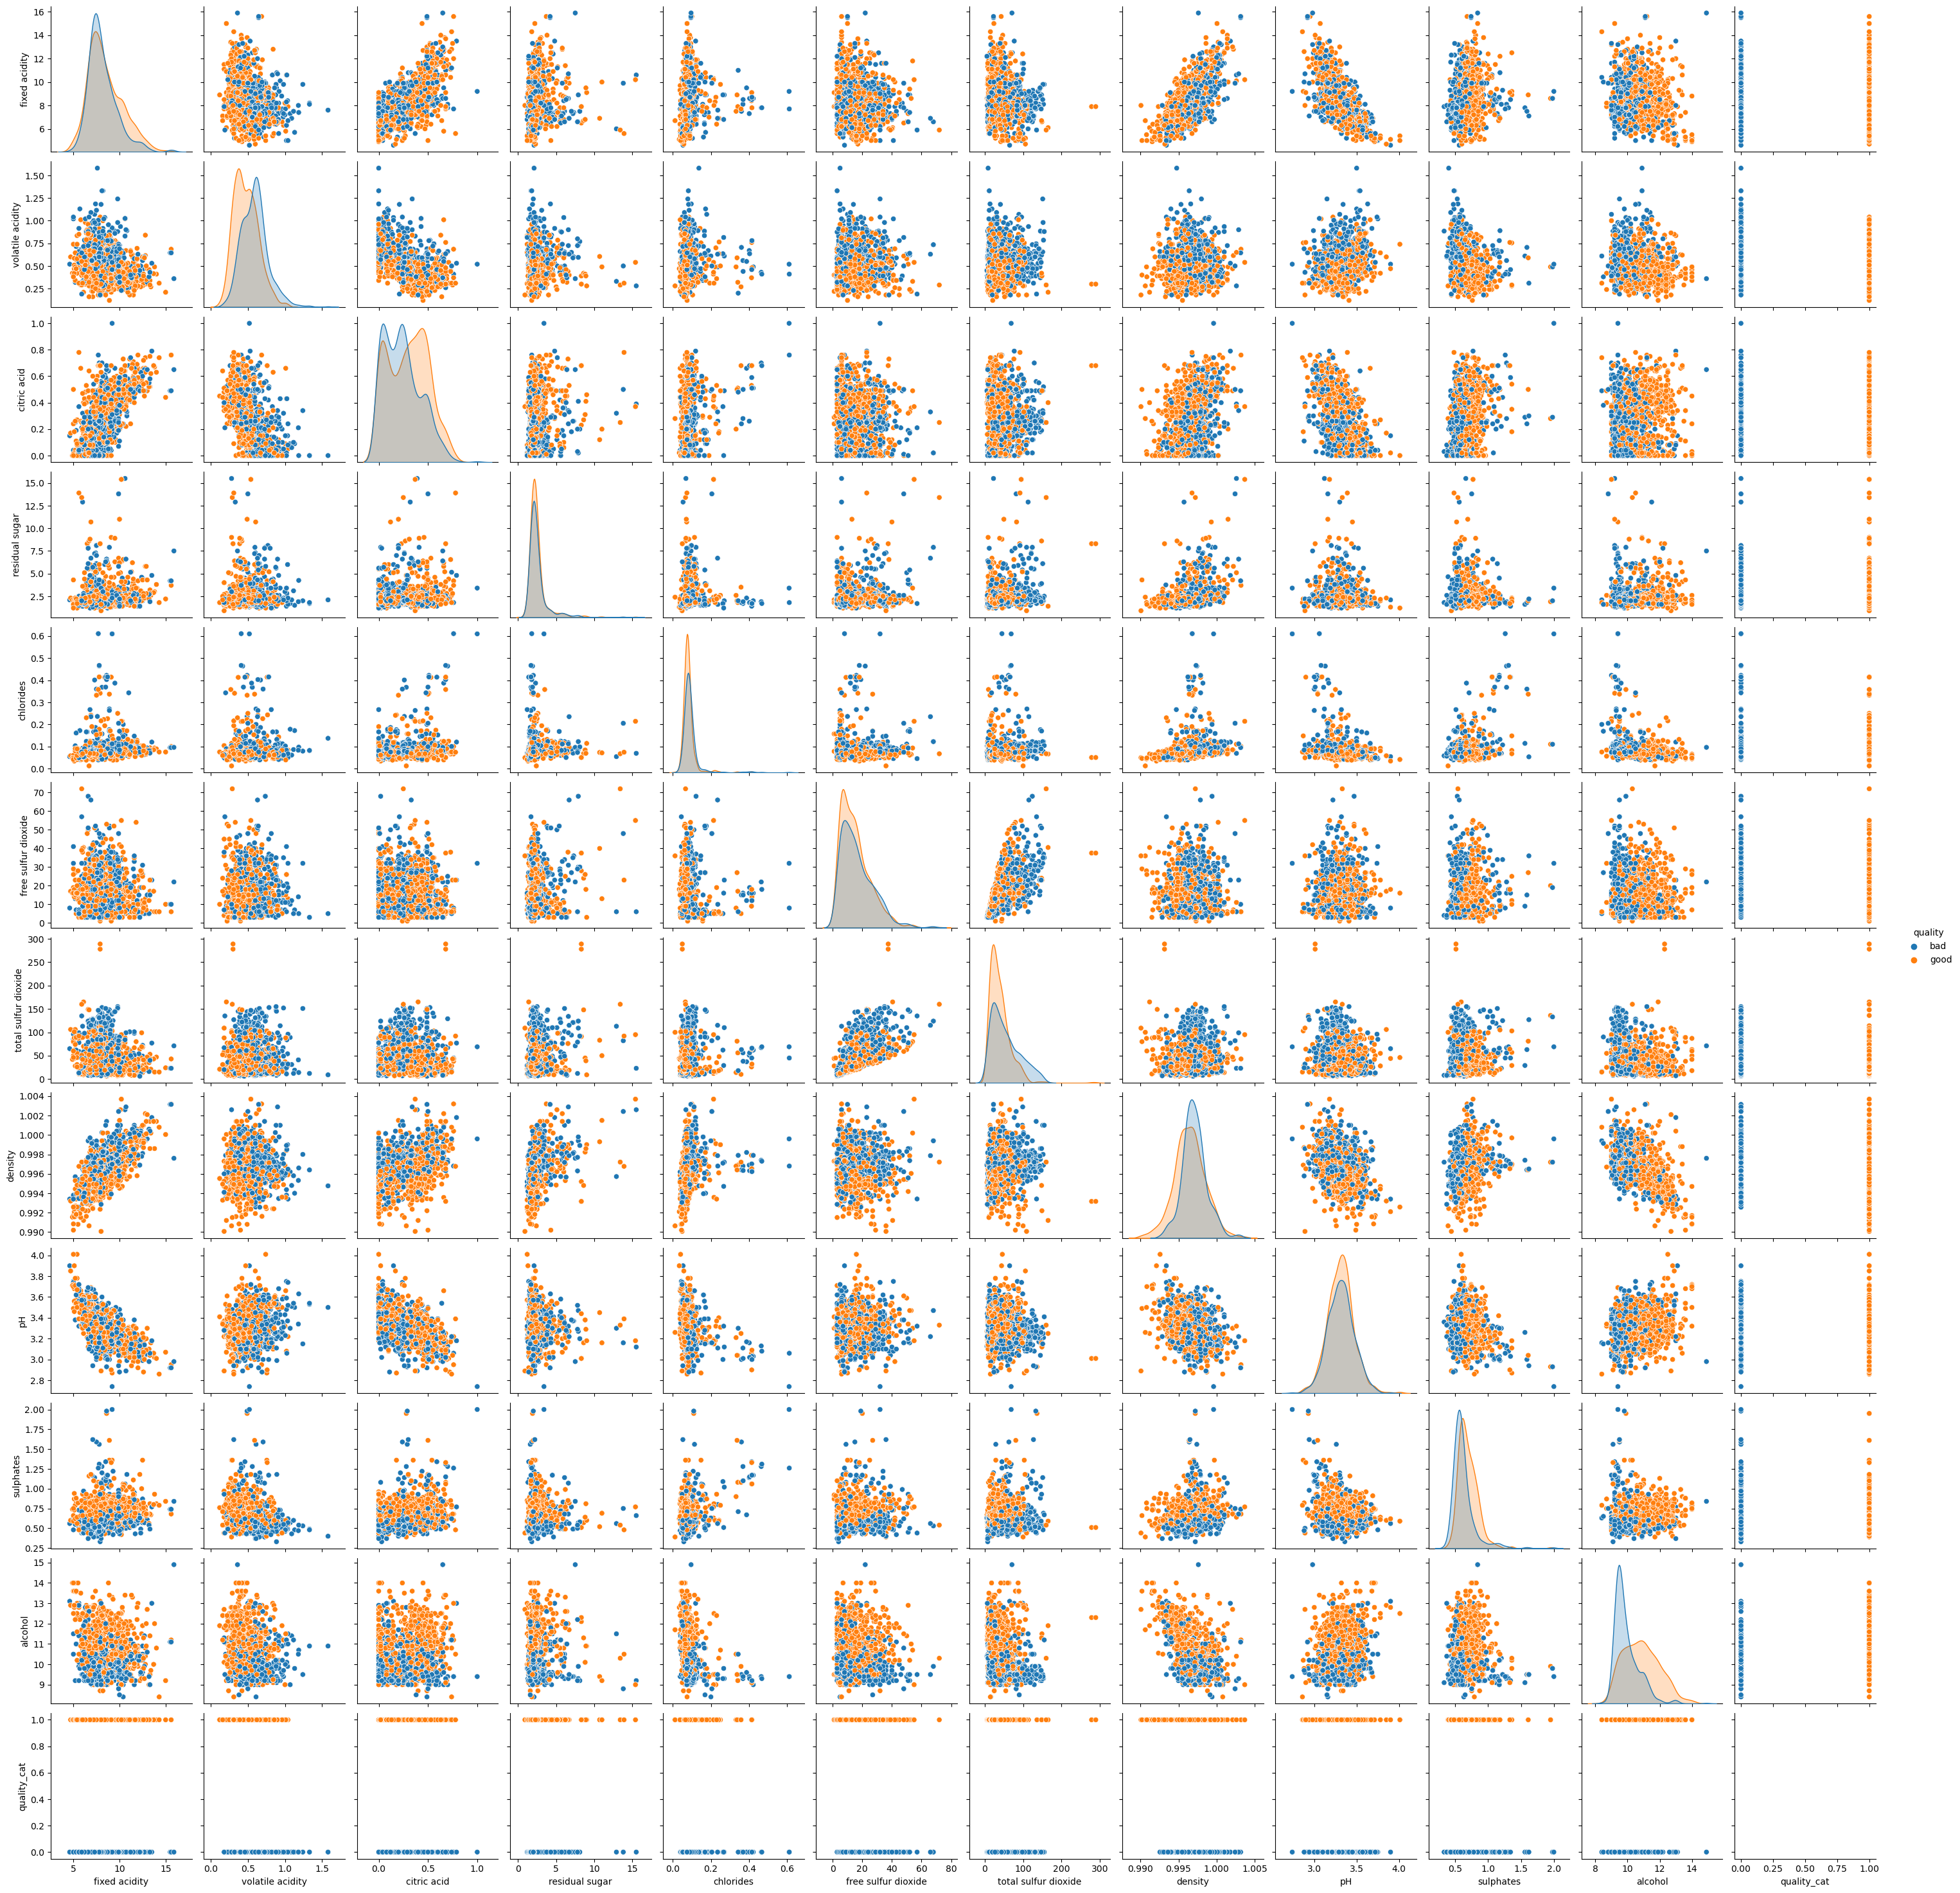

In [24]:
sns.pairplot(data,hue='quality')

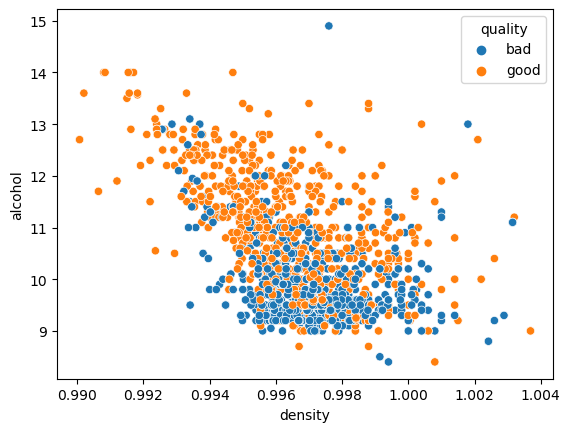

In [27]:
# Plotting the highest correlated pairs
sns.scatterplot(data=data, x='density', y='alcohol', hue='quality')
plt.show()

In [28]:
# Histplot

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_8664\3787292208.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality_cat'}>]], dtype=object)

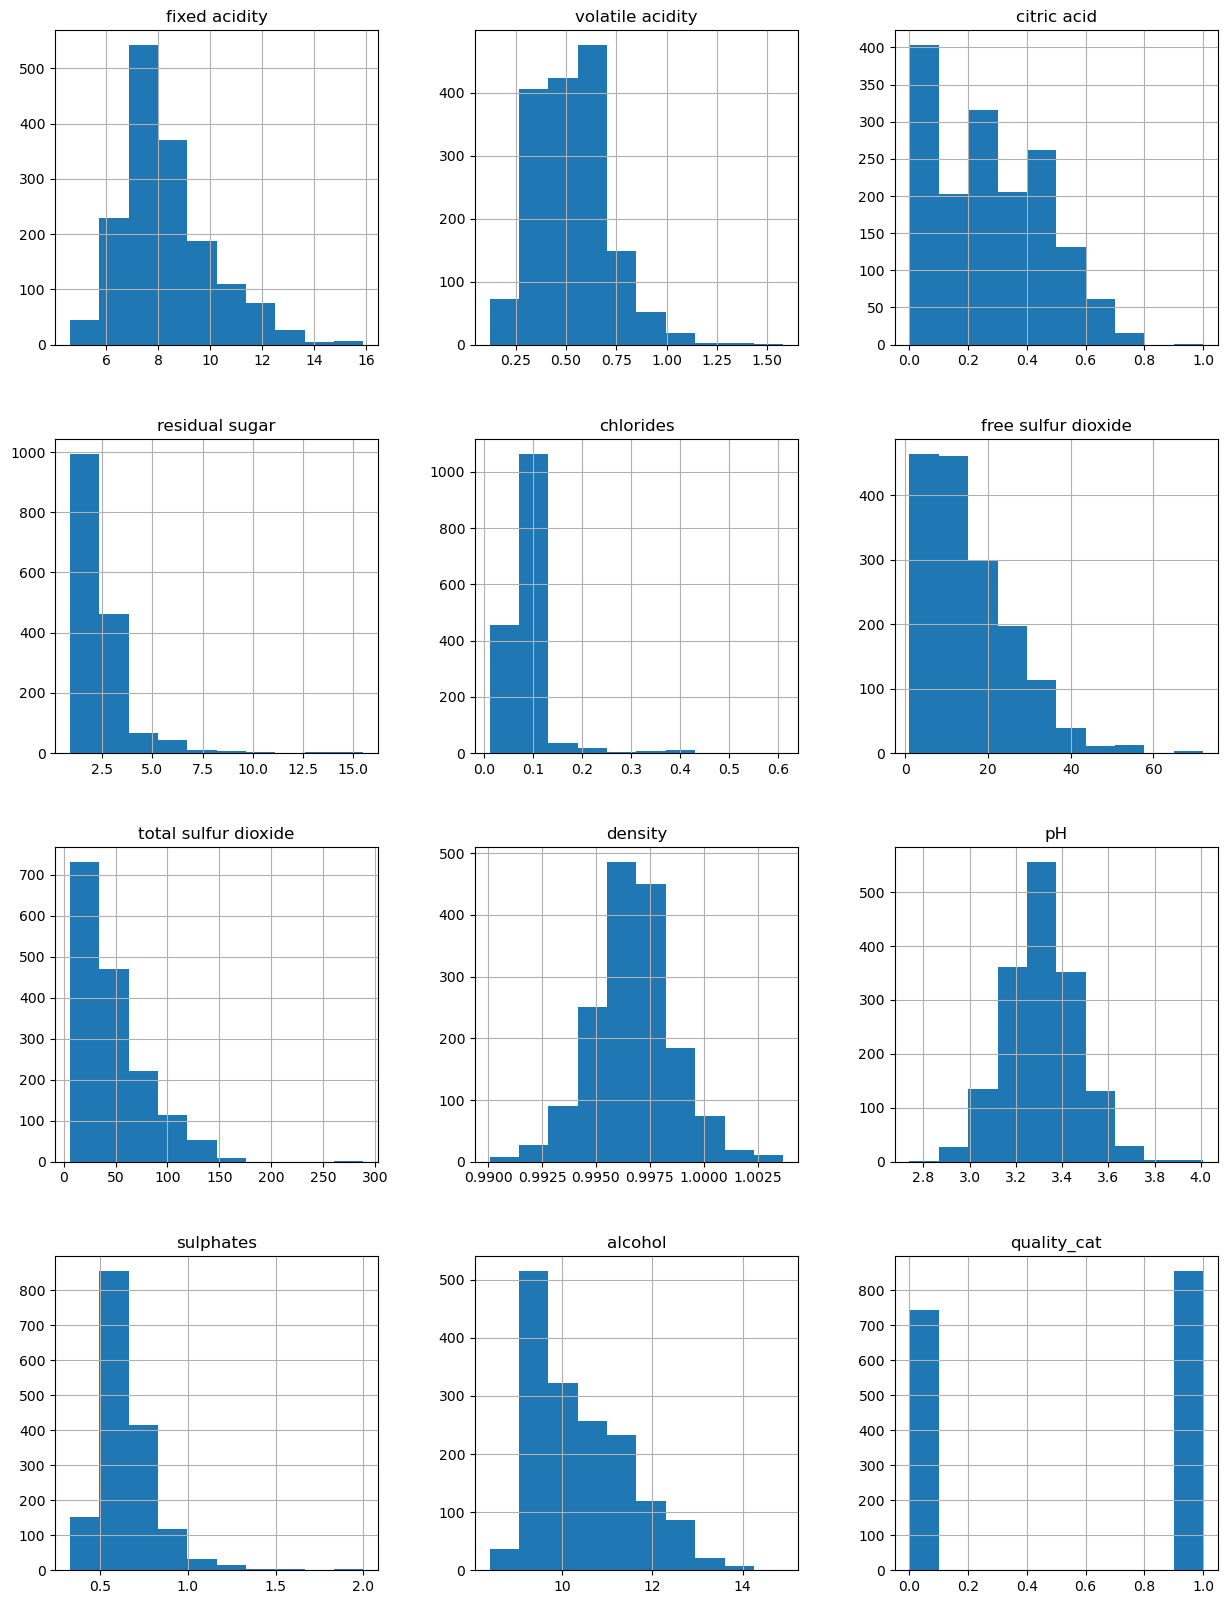

In [29]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

<Axes: title={'center': 'Percentage of good and bad quality wine'}, ylabel='count'>

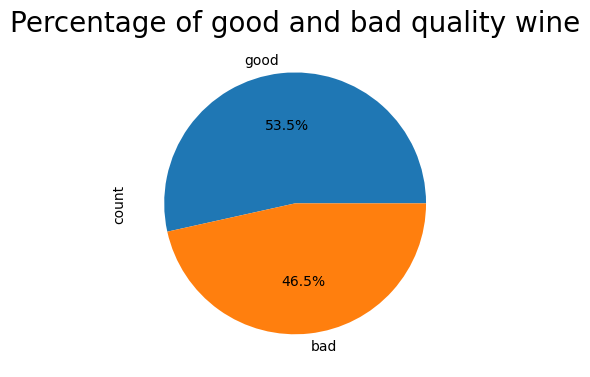

In [31]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0, bottom=0.5, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
plt.subplot(141)
plt.title('Percentage of good and bad quality wine',fontsize = 20)
data['quality'].value_counts().plot.pie(autopct="%1.1f%%")

In [32]:
# find x and y variables

In [46]:
data1 = data.drop('quality',axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality_cat           1599 non-null   int8   
dtypes: float64(11), int8(1)
memory usage: 139.1 KB


In [49]:
X = data1.drop('quality_cat',axis=1)
Y = data1['quality_cat']

In [50]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [51]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality_cat, Length: 1599, dtype: int8

In [52]:
# Split

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=0)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [55]:
# Implement

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [57]:
# scaling

In [58]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1]:
# fit

In [59]:
lr = LogisticRegression()
lr.fit(X_train ,y_train)
y_pred = lr.predict(X_test)

In [60]:
# score

In [61]:
lr.score(X_test,y_test)

0.75

In [64]:
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [3]:
# Confusion matrix

<Axes: >

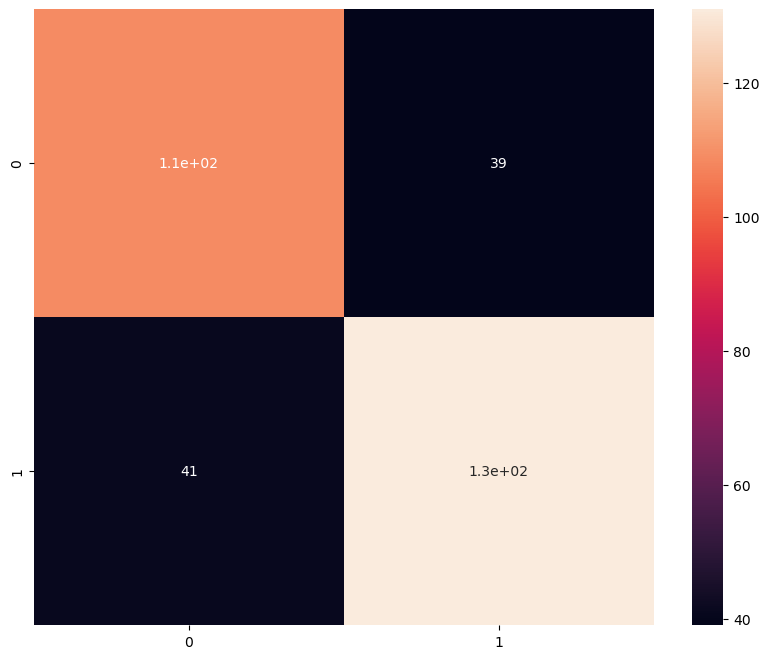

In [62]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

In [63]:
from sklearn.metrics import classification_report
target_names = ['Bad', 'Good']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.73      0.74      0.73       148
        Good       0.77      0.76      0.77       172

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



The classification report provides several important metrics for evaluating the performance of the logistic regression model used to predict wine quality. Here’s an explanation of each metric and what these results indicate about the model's performance:

Detailed Metrics:

**Precision:**

Bad: 0.73

Good: 0.77

Precision is the ratio of true positive predictions to the total predicted positives. It indicates how many of the predicted positive instances are actually positive.

For the 'Bad' class, 73% of the wines predicted as 'Bad' were actually 'Bad'.

For the 'Good' class, 77% of the wines predicted as 'Good' were actually 'Good'.


**Recall:**

Bad: 0.74

Good: 0.76

Recall (or sensitivity) is the ratio of true positive predictions to the total actual positives. It indicates how many of the actual positive instances were correctly predicted.

For the 'Bad' class, 74% of the actual 'Bad' wines were correctly identified as 'Bad'.

For the 'Good' class, 76% of the actual 'Good' wines were correctly identified as 'Good'.


**F1-Score:**

Bad: 0.73

Good: 0.77

The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both concerns.

For the 'Bad' class, the F1-score is 0.73.

For the 'Good' class, the F1-score is 0.77.




**Accuracy** is the ratio of correctly predicted instances to the total instances.

The model correctly predicts the quality of the wine 75% of the time.



**Interpretation:**

The model performs reasonably well, with an overall accuracy of 75%.

Both precision and recall are relatively balanced for both classes, indicating that the model has a consistent performance in identifying 'Bad' and 'Good' wines.

The F1-scores for 'Bad' and 'Good' wines are close, reflecting a good balance between precision and recall for both classes.

The macro and weighted averages are the same (0.75) because the classes are relatively balanced in terms of their support.